**ＪＡＤＥ ＣＨＡＮＧ**

Spring 2023

CS 251: Data Analysis and Visualization

Project 7: Radial Basis Function Neural Networks

In [1]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

## Task 1: RBF Network development dataset

The eventual goal is to train a neural network so that it learns to recognize which human handwritten digit is shown in an image  (i.e. the numbers 0, 1, ..., 9). Before doing this, you will use simpler data to develop and debug your network.

### 1a. Load and preprocess data

- Load in the `rbf_dev_train.csv` and `rbf_dev_test.csv` train and test sets.
- For the train and test sets, separate the data variables (`X` and `Y`) from the class values (*class*). The test code below assumes the following names:
    - `y_train` and `y_test` for the class values in the train and test sets, respectively.
    - `rbf_dev_train` and `rbf_dev_test` for the train and test set data, respectively.
- Normalize each data feature "separately" between 0 and 1 (based on each feature's dynamic range).
    - Use the `min` and `max` values derived from the training set to normalize the test set. *This will ensure that identical feature values in the training and test sets get normalized to the same numeric value.*

**Tip:** It might be a good idea to write a few functions below so that you don't have a lot of duplicate code when processing train and test sets.

In [2]:
train = np.genfromtxt('data/rbf_dev_train.csv', delimiter = ',',skip_header = 1)
test = np.genfromtxt('data/rbf_dev_test.csv', delimiter = ',',skip_header = 1)
print(train)

[[ 16.82  -4.33   0.  ]
 [-21.32  -0.34   0.  ]
 [  5.33  -9.52   1.  ]
 ...
 [ -0.31  24.19   1.  ]
 [  0.87  25.2    1.  ]
 [ -2.96  -9.25   1.  ]]


In [3]:
rbf_dev_train = train[:,0:2]
rbf_dev_test = test[:,0:2]
y_train = train[:,2]
y_test = test[:,2]
print(rbf_dev_train)
print(rbf_dev_test)
print(y_train)
print(y_test)

[[ 16.82  -4.33]
 [-21.32  -0.34]
 [  5.33  -9.52]
 ...
 [ -0.31  24.19]
 [  0.87  25.2 ]
 [ -2.96  -9.25]]
[[ -7.94 -10.29]
 [-17.34   5.46]
 [  9.98   7.77]
 [ -0.43  26.33]
 [ -3.26  -9.05]
 [-14.84   5.09]
 [  8.85  12.57]
 [-16.06 -10.93]
 [ 10.96  18.11]
 [ 10.06   7.83]
 [ -4.06 -12.12]
 [  7.54   8.28]
 [-16.35 -10.33]
 [-15.49  13.23]
 [  3.02  16.63]
 [ -7.03 -14.83]
 [ -5.98 -20.73]
 [-12.45  19.31]
 [ 14.58   9.05]
 [ -5.03 -18.81]
 [ 11.23   8.73]
 [  0.04  27.37]
 [-11.71  18.83]
 [  3.96 -14.68]
 [ 18.9   11.38]
 [  7.33   9.23]
 [  0.56   7.49]
 [  9.55  11.9 ]
 [ 10.64   5.17]
 [ -9.01 -13.31]
 [ -8.77  10.69]
 [ 16.95  -2.01]
 [  1.64  22.74]
 [ -1.6   10.99]
 [  9.11  11.85]
 [ -4.23 -10.67]
 [ -9.21  12.8 ]
 [-10.4   14.32]
 [  4.36 -18.9 ]
 [ 12.79  13.22]
 [  0.21  -9.76]
 [-12.68   8.43]
 [  6.99   7.74]
 [ -0.2   21.95]
 [  9.59   2.26]
 [ -5.94  -0.8 ]
 [ -0.28  -7.79]
 [ -3.01  -9.09]
 [ 18.48   2.6 ]
 [ 10.34  12.09]
 [ 12.96   9.5 ]
 [  6.13 -19.03]
 [-11.66

In [4]:
def normalize (data,t_min,t_max): 
    return (data-t_min)/(t_max-t_min)

In [5]:
normalize_test = normalize(rbf_dev_test, rbf_dev_train.min(axis = 0),rbf_dev_train.max(axis = 0))
normalize_train = normalize(rbf_dev_test, rbf_dev_train.min(axis = 0),rbf_dev_train.max(axis = 0))


print(normalize_test)
print(normalize_train)

[[0.32524 0.23867]
 [0.12142 0.53725]
 [0.71379 0.58104]
 [0.48807 0.93289]
 [0.42671 0.26218]
 [0.17563 0.53024]
 [0.68929 0.67204]
 [0.14918 0.22654]
 [0.73504 0.77706]
 [0.71552 0.58218]
 [0.40937 0.20398]
 [0.66088 0.59071]
 [0.14289 0.23791]
 [0.16154 0.68455]
 [0.56288 0.749  ]
 [0.34497 0.15261]
 [0.36774 0.04076]
 [0.22745 0.79981]
 [0.81353 0.60531]
 [0.38833 0.07716]
 [0.74089 0.59924]
 [0.49827 0.95261]
 [0.2435  0.79071]
 [0.58326 0.15545]
 [0.9072  0.64948]
 [0.65633 0.60872]
 [0.50954 0.57573]
 [0.70447 0.65934]
 [0.7281  0.53175]
 [0.30204 0.18142]
 [0.30724 0.6364 ]
 [0.86492 0.39564]
 [0.53296 0.86483]
 [0.46271 0.64209]
 [0.69493 0.65839]
 [0.40568 0.23147]
 [0.2977  0.6764 ]
 [0.2719  0.70521]
 [0.59193 0.07545]
 [0.77472 0.68436]
 [0.50195 0.24872]
 [0.22246 0.59355]
 [0.64896 0.58047]
 [0.49306 0.84986]
 [0.70533 0.47659]
 [0.3686  0.41858]
 [0.49133 0.28607]
 [0.43213 0.26142]
 [0.89809 0.48303]
 [0.7216  0.66294]
 [0.7784  0.61384]
 [0.63031 0.07299]
 [0.24458 0.

#### Preprocessing test code

The following test code is a good sanity check, but you are encouoraged to do additional testing to make sure that your preprocessing pipeline is working properly.

##### Check dtypes

In [6]:
print(f'Your training set is an ndarray? {isinstance(rbf_dev_train, np.ndarray)}')
print(f'Your training classes is an ndarray? {isinstance(y_train, np.ndarray)}')
print(f'Your test set is an ndarray? {isinstance(rbf_dev_test, np.ndarray)}')
print(f'Your test classes is an ndarray? {isinstance(y_test, np.ndarray)}')

Your training set is an ndarray? True
Your training classes is an ndarray? True
Your test set is an ndarray? True
Your test classes is an ndarray? True


##### Check shapes

In [7]:
print(f'Your training set shape is {rbf_dev_train.shape} and should be (1600, 2).')
print(f'Your training classes shape is {y_train.shape} and should be (1600,).')
print(f'Your test set shape is {rbf_dev_test.shape} and should be (400, 2).')
print(f'Your test classes shape is {y_test.shape} and should be (400,).')

Your training set shape is (1600, 2) and should be (1600, 2).
Your training classes shape is (1600,) and should be (1600,).
Your test set shape is (400, 2) and should be (400, 2).
Your test classes shape is (400,) and should be (400,).


### 1b. Plot data

Create a scatter plot of the training data in the cell below.

- Color code each sample by its output class.
- Make the aspect ratio (height and width) of the x and y axes in the figure equal, otherwise the plot may look distorted.

If everything is working properly, you should see a jack-o-lantern whose eyes, noise, mouth, and stem are colored differently than the rest of the face.

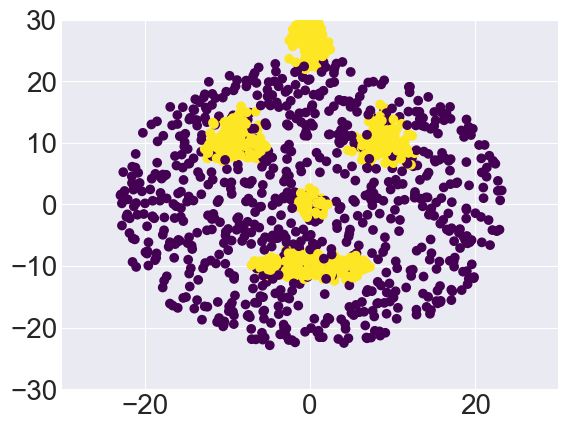

In [8]:
figsize = (6,6)
plt.xlim(-30,30)
plt.ylim(-30,30)
plt.scatter(rbf_dev_train[:,0], rbf_dev_train[:,1],c=y_train, cmap = 'viridis')


## Task 2: Radial basis function neural network

In [11]:
from rbf_net import RBF_Net

### 2a. Network initalization

You will use K-means to initialize the RBF hidden layer prototypes and sigmas.

1. Copy over your `kmeans.py` from your previous project. If your K-means clustering code isn't working properly, you may use `scipy` functions in this project instead, but at a 1 point reduction. Check out `scipy.cluster.vq.kmeans`.

2. Implement the method templates in `rbf.py` that initialize the hidden layer of the neural network:
    - Finish writing the constructor
    - `get_num_hidden_units`
    - `get_num_output_units`
    - `avg_cluster_dist`: Compute the average distance between each cluster center found by K-means and all the points assigned to the same cluster.
    - `initialize`: Use K-means to set the Gaussian hidden unit centers (**prototypes**) and standard deviations (**sigmas**).


In [13]:
from kmeans import KMeans

#### Test `avg_cluster_dist`

In [11]:
np.random.seed(0)

# N = 10 samples, M = 5 features
test_data = np.random.normal(size=(10, 5))
# 4 hidden units / prototypes, each has 5 features
test_centroids = np.random.normal(size=(4, 5))
# Each sample assigned to one of 4 hidden unit prototypes
test_assignments = np.random.randint(low=0, high=4, size=(10,))
kmeansObj = KMeans()

test_net = RBF_Net(4, 3)
print(f'Number of hidden units in your net is {test_net.get_num_hidden_units()} and should be 4')
print(f'Number of output units in your net is {test_net.get_num_output_units()} and should be 3')
test_clust_mean_dists = test_net.avg_cluster_dist(test_data, test_centroids, test_assignments, kmeansObj)

print(f'Your avg within cluster distances are\n{test_clust_mean_dists} and should be\n[2.23811 3.94891 3.12267 3.4321]')

Number of hidden units in your net is 4 and should be 4
Number of output units in your net is 3 and should be 3
Your avg within cluster distances are
[2.23811 3.94891 3.12267 3.4321 ] and should be
[2.23811 3.94891 3.12267 3.4321]


#### Test `initialize`

In [12]:
np.random.seed(0)
test_net.initialize(test_data)

print(f'Your prototypes have shape {test_net.get_prototypes().shape} and the shape should be (4, 5).')
print(f'Your hidden unit sigmas have shape {test_net.sigmas.shape} and the shape should be (4,).')

Your prototypes have shape (4, 5) and the shape should be (4, 5).
Your hidden unit sigmas have shape (4,) and the shape should be (4,).


#### Test initialization methods

In the cell below, write test code for your RBF network initialization:
- Create a new RBF network with 7 hidden units and 2 output classes.
- Call the `initalize` method on it, passing in the training data.
- Create a class color-coded scatterplot of the training data with an equal axis aspect ratio, like above, now with the prototypes clearly marked with a different marker and/or color.

You should see fairly evenly distributed prototypes, with one in most, if not all, "pockets" of samples belonging to a single class.

In [13]:
np.random.seed(0)

rbf = RBF_Net(7,2)
rbf.initialize(rbf_dev_train)

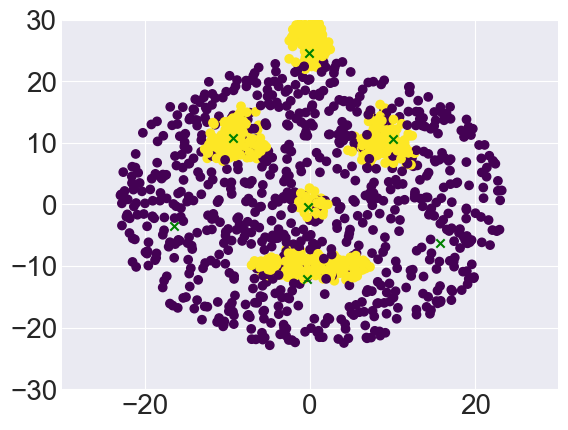

In [14]:
figsize = (6,6)
plt.xlim(-30,30)
plt.ylim(-30,30)
plt.scatter(rbf_dev_train[:,0], rbf_dev_train[:,1],c=y_train, cmap = 'viridis')
plt.scatter(rbf.prototypes[:,0],rbf.prototypes[:,1], c = 'g',marker = 'x')

**Question 1:** Do you think the prototypes enable the RBF network to learn the data well? Why or why not?

**Answer 1:** yes, because it seems like the centroids are well distributed within the data given. 

### 2b. Compute hidden and output layer activations

Implement the following methods so that you can train your RBF network:
- `hidden_act`: Computes hidden layer activation values: Determines the similarity between hidden layer prototypes with the input data.
- `output_act`: Computes output layer activation values: Multiply hidden unit activation by output unit weights.

**Hidden unit activation**:

The activation of hidden unit $j$ to data sample $i$ is computed according to $$H_{ij} = \exp \left (-\frac{\text{dist} \left (\vec{x}_i, \vec{c}_j \right )^2}{2\sigma_j^2 + \epsilon}\right )$$ 
where $\vec{x_i}$ is the data sample, $\vec{c_j}$ is the prototype (center) of the hidden unit, $\sigma_j$ is the hidden unit's standard deviation, $\epsilon$ is a small number (e.g. 1e-8), and $dist(\cdot, \cdot)^2$ is the **squared** Euclidean distance.

#### Test hidden_act

In [15]:
np.random.seed(1)

# N = 3 samples, M = 5 features
test_data = np.random.normal(size=(3, 5))
# 4 hidden units / prototypes, each has 5 features
test_centroids = np.random.normal(size=(4, 5))
# Each sample assigned to one of 4 hidden unit prototypes
test_sigmas = np.random.uniform(size=(4,))
test_wts = 2*np.random.uniform(size=(4+1, 3)) - 1

test_net = RBF_Net(4, 3)
test_net.prototypes = test_centroids
test_net.sigmas = test_sigmas
test_net.wts = test_wts
test_h_act = test_net.hidden_act(test_data)
print(f'Your hidden layer activation is\n{test_h_act}\n\nand should be')
print('[[0.      0.      0.00009 0.00033]\n [0.00013 0.      0.00004 0.00014]\n [0.      0.      0.      0.00001]]')

Your hidden layer activation is
[[0.      0.      0.00009 0.00033]
 [0.00013 0.      0.00004 0.00014]
 [0.      0.      0.      0.00001]]

and should be
[[0.      0.      0.00009 0.00033]
 [0.00013 0.      0.00004 0.00014]
 [0.      0.      0.      0.00001]]


#### Test output_act

In [16]:
# print(test_wts)
# print(test_h_act)
test_out_act = test_net.output_act(test_h_act)
print(f'Your output layer activation is\n{test_out_act}\n\nand should be')
print('[[-0.72136  0.61505 -0.20481]\n [-0.72151  0.61487 -0.20466]\n [-0.72144  0.61479 -0.20465]]')

Your output layer activation is
[[-0.72136  0.61505 -0.20481]
 [-0.72151  0.61487 -0.20466]
 [-0.72144  0.61479 -0.20465]]

and should be
[[-0.72136  0.61505 -0.20481]
 [-0.72151  0.61487 -0.20466]
 [-0.72144  0.61479 -0.20465]]


### 2c. Learn network weights using linear regression

To train your RBF network, you will need to find optimal weights between hidden and output layer neurons to allows your network to accurately classify the training data (i.e. learn from the data). An efficient solution is to use linear regression to solve a least square problem: minimizing the squared difference between the *hidden layer activations* and the *true data classes*.

- **CS251:** In `rbf.py`, implement `linear_regression(A, y)`. To do this, adapt your code from the linear regression project involving `scipy.linalg.lstsq()` or `numpy.linalg.lstsq()`.
- **CS252:** In `rbf.py`, implement `linear_regression(A, y)`. To do this, adapt your code in `linear_regression` to use your QR solver.

#### Test linear regression

Running the following test code should generate a familar regression fit to the Iris data.

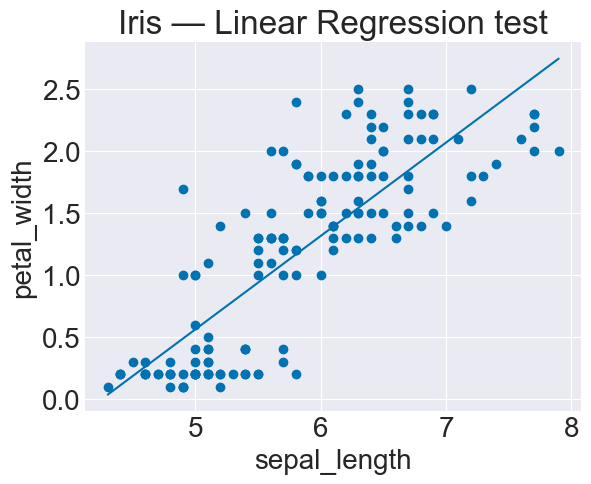

In [17]:
df = pd.read_csv('https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv')
iris = df[['sepal_length', 'petal_width']].to_numpy()

num_hidden_units = 1
num_classes = 4
net = RBF_Net(num_classes=num_classes, num_hidden_units=num_hidden_units)
iris_x = np.reshape(iris[:, 0], [len(iris), 1])
iris_y = np.reshape(iris[:, 1], [len(iris), 1])
iris_c = net.linear_regression(iris_x, iris_y)

line_x = np.linspace(iris_x.min(), iris_x.max())
line_y = line_x * iris_c[0] + iris_c[1]
plt.scatter(iris_x, iris_y)
plt.plot(line_x, line_y)
plt.title('Iris — Linear Regression test')
plt.xlabel('sepal_length')
plt.ylabel('petal_width')
plt.show()

### 2d. Train your RBF Network

Implement the following methods then train your neural network! In the cell below, train a RBF network with 10 hidden units on the RBF dev dataset. **If everything is working, you should get >=88% accuracy on the training set and >=89% on the test set.**

- `train`: Determine the optimal output layer weights that fit hidden layer activation using linear regression.
- `predict`: Use trained network (after learning) to predict the class of data.
- `accuracy`: Compute the accuracy by comparing the network predicted and actual class for each data sample.



In [18]:
rbf_network = RBF_Net(10,2)


In [19]:
# Training set accuracy
rbf_network.train(rbf_dev_train,y_train)


(11,)
(1600,)
(11,)
(1600,)
(11, 2)


In [20]:
# Test set accuracy
y_pred = rbf_network.predict(rbf_dev_test)
result = rbf_network.accuracy(y_test,y_pred)
print(result)

0.91


## Task 3: Handwritten digit classification: MNIST data

You will train a RBF network on a "real" image dataset of handwritten number digits:
- 60,000 images in training set, 10,000 images in test set.
- Each image is 28x28 pixels.
- The images are grayscale (no RGB colors).
- Each image (data sample) contains ONE of 10 numeric digit $0, 1, 2, \ldots, 8, 9$.

The goal is to train your network so that it can correctly predict the numeric digit in an image.

More information about MNIST: http://yann.lecun.com/exdb/mnist/

### 3a. Load in and look at MNIST dataset

- Use the numpy function `load` to load in the MNIST train/test data and the associated class labels.
- Create a 5x5 grid showing the first 25 images in the dataset. It should "look good" (e.g. turn off tick marks).

In [2]:
import numpy as np
x_test = np.load('data/mnist_test_data.npy')
y_test = np.load('data/mnist_test_labels.npy')
x_train = np.load('data/mnist_train_data.npy')
y_train = np.load('data/mnist_train_labels.npy')


In [8]:
print(f'Your training set shape is {x_train.shape} and should be (60000, 28, 28).')
print(f'Your training classes shape is {y_train.shape} and should be (60000,).')
print(f'Your test set shape is {x_test.shape} and should be (10000, 28, 28).')
print(f'Your test classes shape is {y_test.shape} and should be (10000,).')

Your training set shape is (60000, 28, 28) and should be (60000, 28, 28).
Your training classes shape is (60000,) and should be (60000,).
Your test set shape is (10000, 28, 28) and should be (10000, 28, 28).
Your test classes shape is (10000,) and should be (10000,).


### 3b. Preprocess data

- Flatten non-leading dimensions of the train and test sets. For example, the training set should go from (60000, 28, 28) to (60000, 784). **Do not hard code this!** Your code should work for any data with three dimensions.
- Normalize so that the maximum possible value in each image is 1 (and the minimum possible is 0) by dividing by 255.

In [14]:
def flatten(data):
    reshaped = data.reshape(data.shape[0],data.shape[1]*data.shape[2])
    return reshaped

def normalize(data):
    data = data/255
    return data
    

In [15]:
print(x_train.shape)
print(y_train.shape)
x_train = flatten(x_train)
x_train = normalize(x_train)
x_test = flatten(x_test)
x_test = normalize(x_test)

(60000, 28, 28)
(60000,)


### 3c. Train and assess performance on MNIST

Train a RBF network on MNIST. **Your goal is to get >=90% accuracy on both train and test sets.**

**Tips:**
- Depending on your laptop or machine you are using, training could take many hours if you use the full 60,000 sample training set. Select a subset to train on (e.g. ~1500) that takes a reasonable amount of time (e.g. minutes). You should be able to hit your accuracy goals without too much data, effort, or time.
- Do not pare down the test set (i.e. it should remain at 10,000 samples).
- Use the code below to visualize your hidden layer prototypes to help with debugging (assumes your network is called `mnist_net`). Your prototypes should look like images of certain digits, perhaps a little blurrier.

In [98]:
print(x_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [109]:
# train acc
for i in range(10,50,5):
    
    print('no of hidden layers:', i)
    mnist_net = RBF_Net(i,10)

    mnist_net.train(x_train[:10000,:],y_train[:10000])
    


0.6348


In [134]:
# test acc

for i in range(40,150,10):
    
    print('no of hidden layers:', i)
    mnist_net = RBF_Net(i,10)

    mnist_net.train(x_train[:20000,:],y_train[:20000])
    
    # test acc
    y_pred = mnist_net.predict(x_test)
    accuracy = mnist_net.accuracy(y_test,y_pred)
    print("test accuracy: ", accuracy)
    
    # train acc
    y_pred = mnist_net.predict(x_train)
    accuracy = mnist_net.accuracy(y_train,y_pred)
    print("train accuracy: ", accuracy)

no of hidden layers: 40
0.017632007598876953
0.020076990127563477
0.017641067504882812
0.017947912216186523
0.02051377296447754
0.01807117462158203
0.018709897994995117
0.018939733505249023
0.01642012596130371
0.019708871841430664
test accuracy:  0.876
train accuracy:  0.8678333333333333
no of hidden layers: 45
0.019884109497070312
0.019659996032714844
0.019451141357421875
0.019631147384643555
0.02091503143310547
0.0199129581451416
0.02024984359741211
0.020045995712280273
0.018963098526000977
0.01988983154296875
test accuracy:  0.8741
train accuracy:  0.8685833333333334
no of hidden layers: 50
0.02725505828857422
0.025914669036865234
0.02599191665649414
0.025487899780273438
0.02565312385559082
0.026155948638916016
0.025790929794311523
0.02509593963623047
0.02679896354675293
0.026787757873535156
test accuracy:  0.8863
train accuracy:  0.8762833333333333
no of hidden layers: 55
0.02981710433959961
0.029143095016479492
0.028853178024291992
0.029568195343017578
0.030844926834106445
0.02935

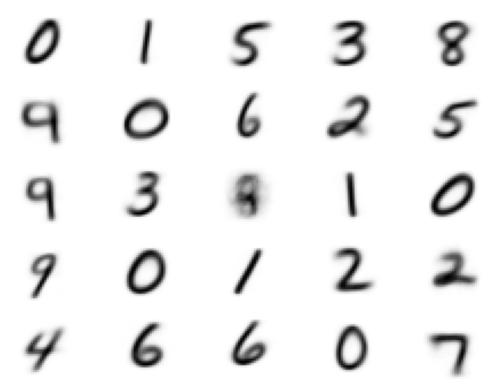

In [112]:
# Visualize network hidden layer prototypes
prototypes = mnist_net.get_prototypes()
prototypes = np.reshape(prototypes, [prototypes.shape[0], 28, 28])

cols = rows = 5
fig, axes = plt.subplots(nrows=rows, ncols=cols)
for i in range(rows):
    for j in range(cols):
        axes[i, j].imshow(prototypes[i*rows + j])
        axes[i, j].set_xticks([])
        axes[i, j].set_yticks([])

**Question 2:** Which part of the training process takes the longest?

**Answer 2:** the clustering process of the rbf_network takes the longest. 

**Question 3:** What accuracy did you achieve on the training set? List all parameters that you needed to set (e.g. number of training samples, number hidden units, etc).

**Answer 3:** number of hidden layer and the number of training data. 

**Question 4:** Using the same parameters to get the training accuracy that you reported in Question 3, what test accuracy did you achieve?

**Answer 4:** I achieved 0.90 accuracy for test data with 70 hidden layers and taking 20000 samples of data. 

## Extensions

To receive credit for any extension, you must:
- Not modify / prevent any code from the core project from working (e.g. make a copy before changing). In other words, **the notebook test code should still work!**
- **You must describe what you did and what you found in detail**. This includes a summary of parameter values used in your simulations.
- Include (*labeled!*) plots and/or numbers to present your results.
- Write up your extensions below or in a separate notebook.

**Rule of thumb: one deep, thorough extension is worth more than several quick, shallow extensions!**

### 1) Improve performance on MNIST with PCA

Using all 768 features (pixels) in each image may not be very helpful for classification. For example, pixels around the border are almost always white. Transform the dataset(s) using PCA to compress the number of features before training your RBF network. Experiment with PCA to improve classification accuracy and runtime performance.

In [8]:
import pca_cov
import time
pca = pca_cov.PCA_COV(x_train)

In [9]:
print(x_train.shape)
x_train_vec = x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2])

(60000, 28, 28)


In [10]:
df = pd.DataFrame(x_train_vec)
pca = pca_cov.PCA_COV(df)
pca.pca(list(range(784)))

df = pd.DataFrame(x_train_vec)
import time
start = time.time()
pca.pca(list(range(784)))
end = time.time()
result = end-start
print("time it takes to train:",result)

time it takes to train: 1.6805009841918945


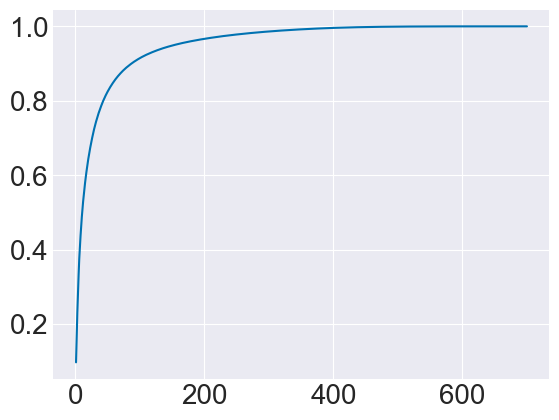

In [11]:
pca.elbow_plot(700)

this tells me that I should only need about 150 pcs to represent my dataset

In [12]:
def make_imgs(reconstucted_imgs):
    '''Inflates a 1D feature vector representation of images into 2D images for plotting.
    Assumes square images
    
    Parameters:
    -----------
    reconstucted_imgs: ndarray. shape=(#)
        1D vector representation of each image
    
    Returns:
    -----------
    ndarray. shape=(N, img_y, img_x)
        The images inflated into 2D
    '''
    reconstructed_imgs = reconstucted_imgs.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2])
    return reconstructed_imgs

In [13]:
reconstructed = pca.pca_then_project_back(150)
print(x_train.shape)
print(reconstructed.shape)
fifty_variance = make_imgs(reconstructed)

(60000, 28, 28)
(60000, 784)


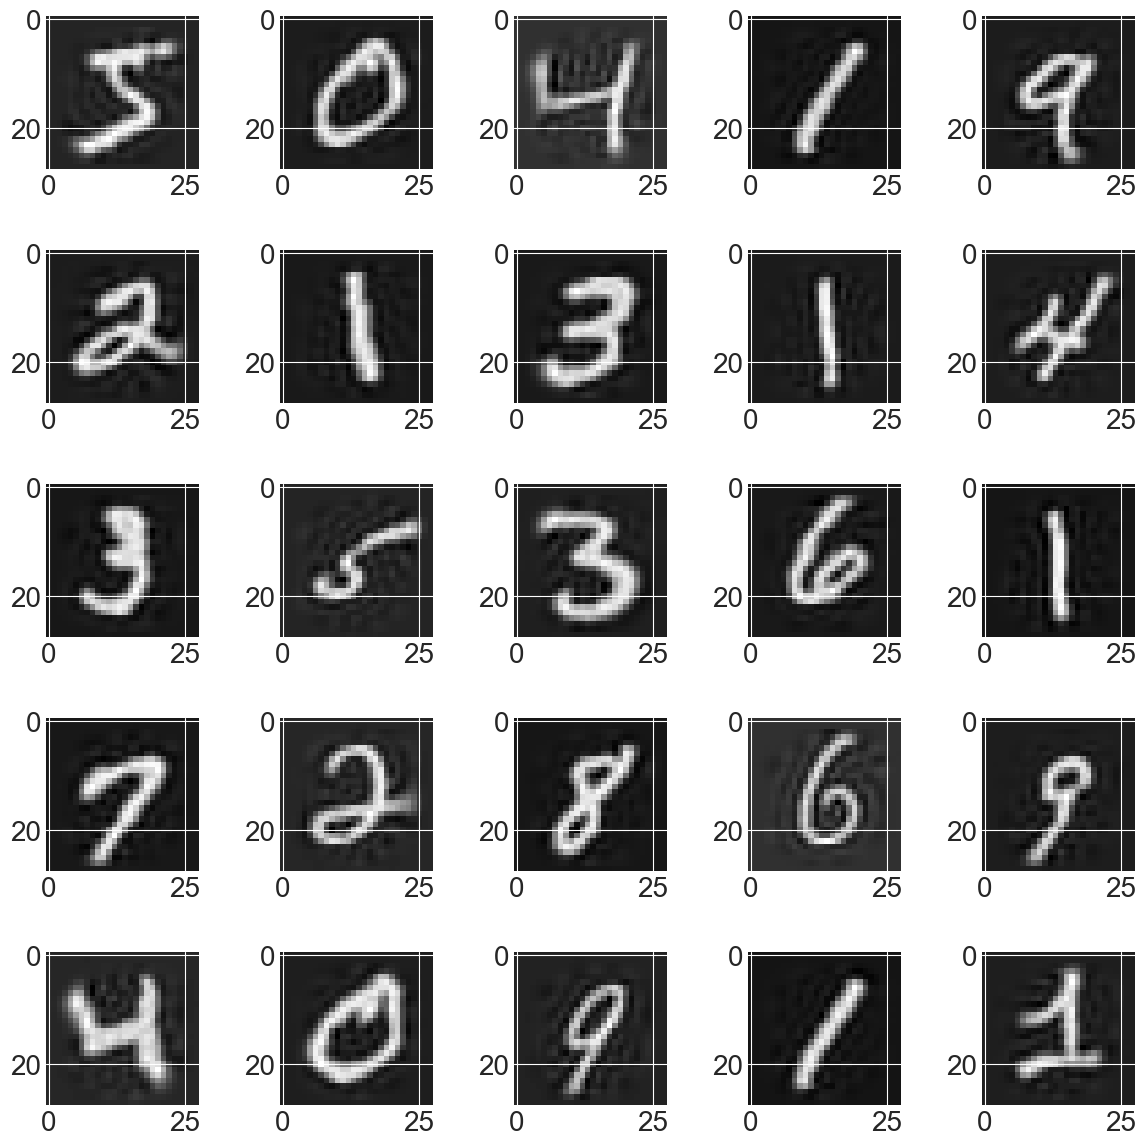

In [14]:
fig, ax = plt.subplots(5,5,figsize=(12,12))
fig.tight_layout()
for i in range(5):
    for j in range(5):
        index=i*5+j
        ax[i,j].imshow(fifty_variance[index],cmap=plt.get_cmap('gray'))

As we can see from the graph. Using only 150 pcs still captures the outline of all the digits quite well. 

In [ ]:
pca_train = pca.pca_project(x_train_vec)
x_test_vec = x_test.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2])
pca_test = pca.pca_project(x_test_vec)
pca_net = RBF_Net(num_hidden_units = 40, num_classes = 10)
b = time.time()
pca_net.train(pca_train, y_train)
e = time.time()
print("It took {e-b} seconds to train")

In [ ]:
pca_test_pred = pca.net.predict(pca_test)
pca_acc = pca_net.

### 2) Visualize network predictions

Make visualizations to show and interpret the MNIST network predictions. Lots of possibilities, here are a few specific ideas:
- Make show a grid of test samples labeled with their predicted digit.
- Analyze if the network performance favors accuracy for certain digits and not others.
- Are errors on certain classes correlated in any way? Does it depend on their digit similarity (e.g. 1 looks like a 7, but not a 0).
- Make and interpret a confusion plot.

### 3) Explore parameter space

When training your RBF network on MNIST, you had to pick some parameter values to use by hand. Pick one or more parameters and systematically vary them to quantify their effect on accuracy and simulation time.

change hidden unit and data samples with for loops

In [ ]:
import time 

#change no of hidden layers
for i in range(40,60,10):
    
    start = time.time()
    print('no of hidden layers:', i)
    mnist_net = RBF_Net(i,10)

    mnist_net.train(x_train[:20000,:],y_train[:20000])
    
    # test acc
    y_pred = mnist_net.predict(x_test)
    accuracy = mnist_net.accuracy(y_test,y_pred)
    print("test accuracy: ", accuracy)
    
    # train acc
    y_pred = mnist_net.predict(x_train)
    accuracy = mnist_net.accuracy(y_train,y_pred)
    print("train accuracy: ", accuracy)
    
    end = time.time()
    result = end-start

having more hidden layers increases training time. But it increases accuracy. 

In [17]:
for i in range(10000,60000,10000):
    import time 
    start = time.time()
    print('no of hidden layers:', i)
    mnist_net = RBF_Net(40,10)

    mnist_net.train(x_train[:i,:],y_train[:i])
    
    # test acc
    y_pred = mnist_net.predict(x_test)
    accuracy = mnist_net.accuracy(y_test,y_pred)
    print("test accuracy: ", accuracy)
    
    # train acc
    y_pred = mnist_net.predict(x_train)
    accuracy = mnist_net.accuracy(y_train,y_pred)
    print("train accuracy: ", accuracy)
    
    end = time.time()

no of hidden layers: 10000
linear regression runtime:   0.010565042495727539
linear regression runtime:   0.008713960647583008
linear regression runtime:   0.008723974227905273
linear regression runtime:   0.009322881698608398
linear regression runtime:   0.009179115295410156
linear regression runtime:   0.009685039520263672
linear regression runtime:   0.009704828262329102
linear regression runtime:   0.008558034896850586
linear regression runtime:   0.008723974227905273
linear regression runtime:   0.0093231201171875
test accuracy:  0.8642
train accuracy:  0.85845
no of hidden layers: 20000
linear regression runtime:   0.016289949417114258
linear regression runtime:   0.016256093978881836
linear regression runtime:   0.014142990112304688
linear regression runtime:   0.01464986801147461
linear regression runtime:   0.015892982482910156
linear regression runtime:   0.015640735626220703
linear regression runtime:   0.015652894973754883
linear regression runtime:   0.015616178512573242
l

KeyboardInterrupt: 

having more training increases the training time. But it increases accuracy. 

### 4) Initialization schemes

Research, test out, and quantify the performance of different techniques to set the hidden unit prototypes and sigmas. For example, an alternative way to initialize the prototypes is to perform K-means to cluster each class *separately*. 

need to change the initialize method in the rbf network.py file

In [18]:
mnist_net = RBF_Net(40,10)

mnist_net.train(x_train[:10000,:],y_train[:10000],separate = True)

# test acc
y_pred = mnist_net.predict(x_test)
accuracy = mnist_net.accuracy(y_test,y_pred)
print("test accuracy: ", accuracy)

# train acc
y_pred = mnist_net.predict(x_train)
accuracy = mnist_net.accuracy(y_train,y_pred)
print("train accuracy: ", accuracy)

linear regression runtime:   0.009596109390258789
linear regression runtime:   0.008839845657348633
linear regression runtime:   0.009229898452758789
linear regression runtime:   0.00856924057006836
linear regression runtime:   0.00976419448852539
linear regression runtime:   0.009258031845092773
linear regression runtime:   0.00966024398803711
linear regression runtime:   0.008929014205932617
linear regression runtime:   0.008812904357910156
linear regression runtime:   0.00908803939819336
test accuracy:  0.8965
train accuracy:  0.89105


by initializing the kmeans according to the class increases the accuracy of the model.

### 5) Other datasets

Use your RBF network to classify other datasets.

In [19]:
def make_train_test_sets(features, y, test_prop=0.2, shuffle=True):
    '''Divide up the dataset `features` into subsets ("splits") for training and testing. The size
    of each split is determined by `test_prop`.

    Parameters:
    -----------
    features. ndarray. shape=(num_emails, num_features).
        Vector of word counts from the `top_words` list for each email.
    y. ndarray of nonnegative ints. shape=(num_emails,).
        Class index for each email (spam/ham)
    test_prop: float. Value between 0 and 1. What proportion of the dataset samples should we use
        for the test set? e.g. 0.2 means 20% of samples are used for the test set, the remaining
        80% are used in training.
    shuffle: boolean. Should we shuffle the data before splitting it into train/test sets?

    Returns:
    -----------
    x_train: ndarray. shape=(num_train_samps, num_features).
        Training dataset
    y_train: ndarray. shape=(num_train_samps,).
        Class values for the training set
    inds_train: ndarray. shape=(num_train_samps,).
        The index of each training set email in the original unshuffled dataset.
        For example: if we have originally N=5 emails in the dataset, their indices are
        [0, 1, 2, 3, 4]. Then we shuffle the data. The indices are now [4, 0, 3, 2, 1]
        let's say we put the 1st 3 samples in the training set and the remaining
        ones in the test set. inds_train = [4, 0, 3] and inds_test = [2, 1].
    x_test: ndarray. shape=(num_test_samps, num_features).
        Test dataset
    y_test:ndarray. shape=(num_test_samps,).
        Class values for the test set
    inds_test: ndarray. shape=(num_test_samps,).
        The index of each test set email in the original unshuffled dataset.
        For example: if we have originally N=5 emails in the dataset, their indices are
        [0, 1, 2, 3, 4]. Then we shuffle the data. The indices are now [4, 0, 3, 2, 1]
        let's say we put the 1st 3 samples in the training set and the remaining
        ones in the test set. inds_train = [4, 0, 3] and inds_test = [2, 1].
    '''
    inds = np.arange(y.size)
    if shuffle:
        features = features.copy()
        y = y.copy()

        inds = np.arange(y.size)
        np.random.shuffle(inds)
        features = features[inds]
        y = y[inds]

    # Your code here:

    split = int((1 - test_prop)*features.shape[0])

    x_train = features[:split, :]
    x_test = features[split:, :]
    y_train = y[:split]
    y_test = y[split:]

    inds_train = inds[:split]
    inds_test = inds[split:]

    return x_train, y_train, inds_train, x_test, y_test, inds_test

In [20]:
from sklearn import neighbors, datasets
iris = datasets.load_iris()
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets


import pandas as pd
from rbf_net import RBF_Net
from kmeans import KMeans

iris = datasets.load_iris()

# prepare data
X = iris.data[:, :2]
y = iris.target
h = .02

iris_x_train, iris_y_train, iris_inds_train, iris_x_test, iris_y_test, iris_inds_test = make_train_test_sets(X,y)


num_hidden_units = 30
num_classes = 4
net = RBF_Net(num_classes=num_classes, num_hidden_units=num_hidden_units)


# iris_x = flatten(X)
# iris_y = normalize(y)


net.train(iris_x_train,iris_y_train)

# train acc
y_pred = net.predict(iris_x_train)
accuracy = net.accuracy(iris_y_train,y_pred)
print("train accuracy: ", accuracy)

# test acc
y_pred = net.predict(iris_x_test)
accuracy = net.accuracy(iris_y_test,y_pred)
print("test accuracy: ", accuracy)



linear regression runtime:   0.00026702880859375
linear regression runtime:   0.0002148151397705078
linear regression runtime:   0.00019621849060058594
linear regression runtime:   0.0001857280731201172
train accuracy:  0.8666666666666667
test accuracy:  0.6


### 6) SVD-based linear regression

Implement a SVD-based linear regression method, which is both fast and numerically accurate. In the equation $Ac = y$ The weights $c$ can be solved via the following matrix equation: $$c = A^+y$$ where $A^+$ is the pseudo inverse of the matrix of RBF hidden layer activations $A$ (*data matrix*) and the correct classes $y$.

Relying on numpy to figure out the pseudoinverse would be a mini extension, computing the pseudoinverse yourself would be a larger extension.

In [21]:

# SVD 
print("SVD: ")
mnist_net = RBF_Net(40,10)

mnist_net.train(x_train[:10000,:],y_train[:10000],separate = True, svd = True)

# test acc
y_pred = mnist_net.predict(x_test)
accuracy = mnist_net.accuracy(y_test,y_pred)
print("test accuracy: ", accuracy)

# train acc
y_pred = mnist_net.predict(x_train)
accuracy = mnist_net.accuracy(y_train,y_pred)
print("train accuracy: ", accuracy)


SVD: 
svd regression run time:  0.017947673797607422
svd regression run time:  0.013468027114868164
svd regression run time:  0.01844477653503418
svd regression run time:  0.019130229949951172
svd regression run time:  0.01726508140563965
svd regression run time:  0.017638206481933594
svd regression run time:  0.021897077560424805
svd regression run time:  0.018641948699951172
svd regression run time:  0.017857074737548828
svd regression run time:  0.016098976135253906
test accuracy:  0.895
train accuracy:  0.88995


In [22]:
# Lstsq Regression

print("lstsq")
mnist_net = RBF_Net(40,10)

mnist_net.train(x_train[:10000,:],y_train[:10000],separate = True)

# test acc
y_pred = mnist_net.predict(x_test)
accuracy = mnist_net.accuracy(y_test,y_pred)
print("test accuracy: ", accuracy)

# train acc
y_pred = mnist_net.predict(x_train)
accuracy = mnist_net.accuracy(y_train,y_pred)
print("train accuracy: ", accuracy)

lstsq
linear regression runtime:   0.009412050247192383
linear regression runtime:   0.008969783782958984
linear regression runtime:   0.009088993072509766
linear regression runtime:   0.009074926376342773
linear regression runtime:   0.008987188339233398
linear regression runtime:   0.009098052978515625
linear regression runtime:   0.008623838424682617
linear regression runtime:   0.009143590927124023
linear regression runtime:   0.008898019790649414
linear regression runtime:   0.00952601432800293
test accuracy:  0.8978
train accuracy:  0.89095


### 7) Analyze the trained network

Run simulations then analyze and interpret the results. Here are some ideas:
- Visualize and analyze how the prototypes influence the classification results.
- Visualize and analyze how the network weights influence the classification results.

In [23]:
from sklearn import neighbors, datasets
iris = datasets.load_iris()

/var/folders/mq/1y998ggn22x4bnsc2trj8c0w0000gn/T/ipykernel_69799/1379156655.py:37: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


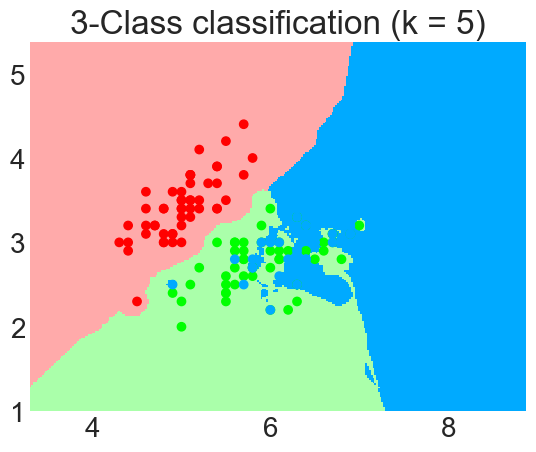

In [24]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 5

# import some data to play with
iris = datasets.load_iris()

# prepare data
X = iris.data[:, :2]
y = iris.target
h = .02

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00','#00AAFF'])

# we create an instance of Neighbours Classifier and fit the data.
clf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
clf.fit(X, y)

# calculate min, max and limits
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))

# predict class using data and kNN classifier
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i)" % (n_neighbors))
plt.show()

linear regression runtime:   0.0001289844512939453
linear regression runtime:   0.0002663135528564453
linear regression runtime:   8.296966552734375e-05
linear regression runtime:   7.796287536621094e-05


/var/folders/mq/1y998ggn22x4bnsc2trj8c0w0000gn/T/ipykernel_69799/3700267493.py:45: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  ax[i,j].pcolormesh(xx, yy, Z, cmap=cmap_light)


train accuracy:  0.8133333333333334
linear regression runtime:   0.0002009868621826172
linear regression runtime:   0.0001938343048095703
linear regression runtime:   0.0001442432403564453
linear regression runtime:   0.000141143798828125
train accuracy:  0.82
linear regression runtime:   0.0006263256072998047
linear regression runtime:   0.0004930496215820312
linear regression runtime:   0.0005970001220703125
linear regression runtime:   0.0012879371643066406
train accuracy:  0.8333333333333334
linear regression runtime:   0.0003991127014160156
linear regression runtime:   0.0003552436828613281
linear regression runtime:   0.0003337860107421875
linear regression runtime:   0.0003190040588378906
train accuracy:  0.82


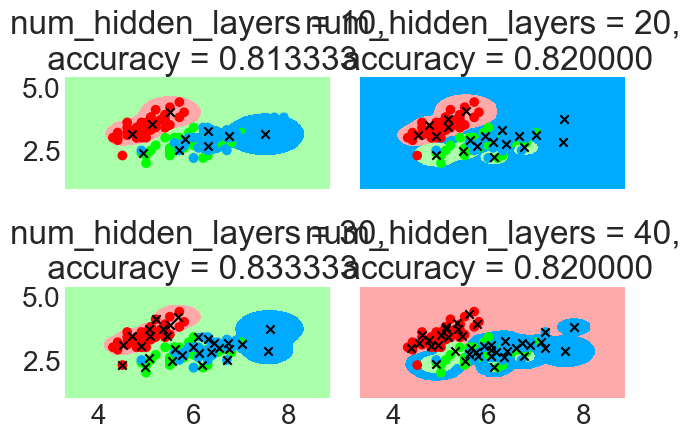

In [25]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 5

# import some data to play with
iris = datasets.load_iris()

# prepare data
X = iris.data[:, :2]
y = iris.target
h = .02

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00','#00AAFF'])


fig, ax = plt.subplots(2, 2, sharex=True, sharey=True, squeeze = True)


for i in range(0,2):
    for j in range(0,2):
        num_hidden_layers = 10*(i*2+j+1)
        num_class = 4
        # we create an instance of rbf_net and fit the data.
        clf = RBF_Net(num_hidden_layers,num_class)
        clf.train(X, y)

        # calculate min, max and limits
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h))

        # predict class using data and kMeans classifier
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        #plt.figure()
        ax[i,j].pcolormesh(xx, yy, Z, cmap=cmap_light)
        
        y_pred = clf.predict(X)
        accuracy = clf.accuracy(y,y_pred)
        print("train accuracy: ", accuracy)

        # Plot also the training points
        ax[i,j].scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
        ax[i,j].scatter(clf.prototypes[:,0],clf.prototypes[:,1],marker = 'x',c = 'black')
        ax[i,j].set_xlim(xx.min(), xx.max())
        ax[i,j].set_ylim(yy.min(), yy.max())
        ax[i,j].set_title("num_hidden_layers = %i,\n accuracy = %f" % (num_hidden_layers,accuracy))
        
        
fig.tight_layout()      
      

Although we can see that the accuracy increases as num of hidden layer increases from 10 to 20, there is not a lot of difference between 30 to 40. This shows that accuracy does not always increase proportionally with the number of hidden layers. It plateaus at a certain point. This is because k-means initialization is random and the result is heavily dependent on that. Also, this is because as the number of prototypes increases, there are fewer points in a given cluster, which means that it is only predicting using few information.

### 8) RBF networks for regression (CS252)

- Analyze the regression neural network's performance in scenarios when the training set is not equal to the training set.
- Explore and analyze how the RBF network could perform regression on a function with several inputs (e.g. $z = f(x, y)$). Test with real or simulated data.
- Explore and analyze how the RBF network could perform regression on a vector valued function with several outputs (e.g. $(y, z) = f(x)$). Test with real or simulated data.